Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im1.jpeg...


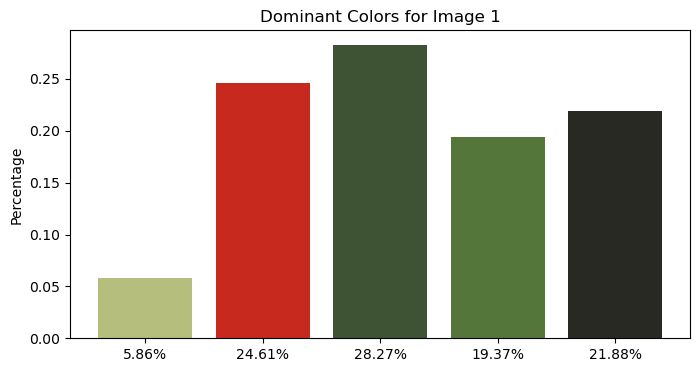

Image 1 Dominant Colors (RGB): [array([182, 190, 125], dtype=uint8), array([199,  41,  31], dtype=uint8), array([62, 83, 52], dtype=uint8), array([ 85, 118,  58], dtype=uint8), array([41, 41, 36], dtype=uint8)]
Image 1 Percentages: [0.05855936 0.24614009 0.28272231 0.19374069 0.21883756]
Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im2.jpeg...


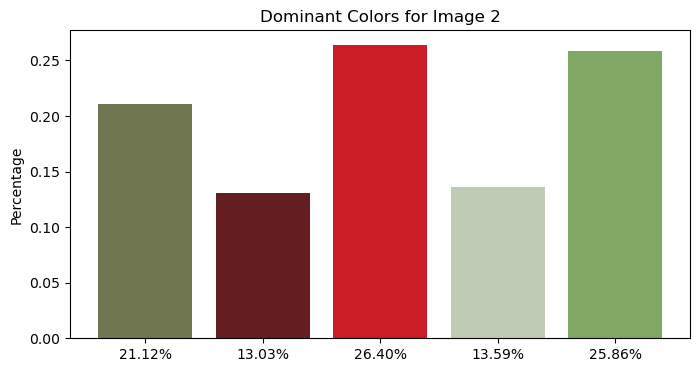

Image 2 Dominant Colors (RGB): [array([112, 118,  79], dtype=uint8), array([101,  30,  32], dtype=uint8), array([202,  29,  37], dtype=uint8), array([192, 203, 181], dtype=uint8), array([129, 167, 101], dtype=uint8)]
Image 2 Percentages: [0.21116741 0.13033284 0.2639841  0.13589667 0.25861898]
Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im3.jpeg...


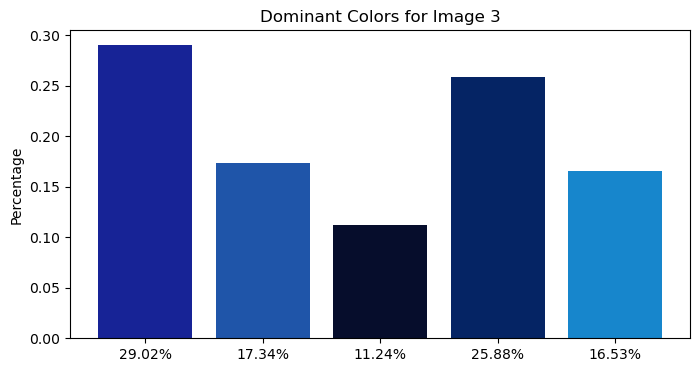

Image 3 Dominant Colors (RGB): [array([ 23,  35, 150], dtype=uint8), array([ 31,  85, 169], dtype=uint8), array([ 6, 13, 44], dtype=uint8), array([  5,  36, 100], dtype=uint8), array([ 23, 134, 204], dtype=uint8)]
Image 3 Percentages: [0.29022363 0.17336236 0.11236889 0.25877696 0.16526816]
Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im4.jpeg...


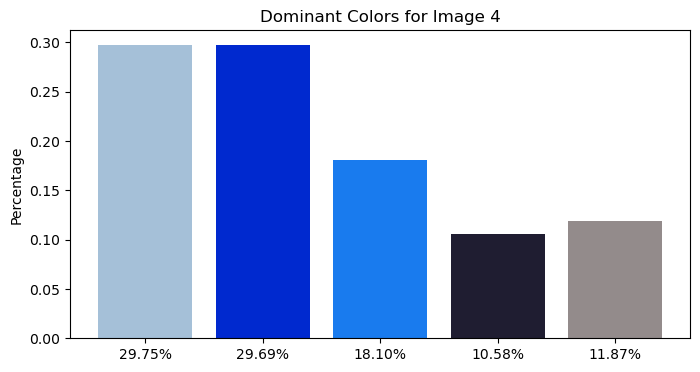

Image 4 Dominant Colors (RGB): [array([165, 192, 216], dtype=uint8), array([  0,  41, 207], dtype=uint8), array([ 25, 123, 238], dtype=uint8), array([31, 29, 49], dtype=uint8), array([147, 139, 139], dtype=uint8)]
Image 4 Percentages: [0.29750621 0.29694983 0.18104322 0.10583209 0.11866865]
Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im5.jpeg...


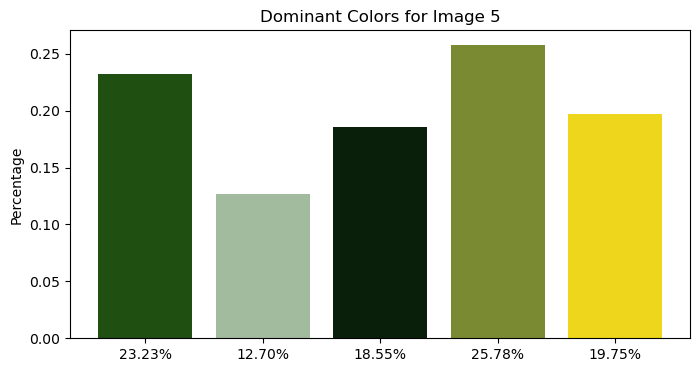

Image 5 Dominant Colors (RGB): [array([32, 79, 18], dtype=uint8), array([162, 187, 158], dtype=uint8), array([ 9, 31,  9], dtype=uint8), array([121, 138,  51], dtype=uint8), array([237, 214,  27], dtype=uint8)]
Image 5 Percentages: [0.23230885 0.12695305 0.18545548 0.25776275 0.19751988]
Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im6.jpeg...


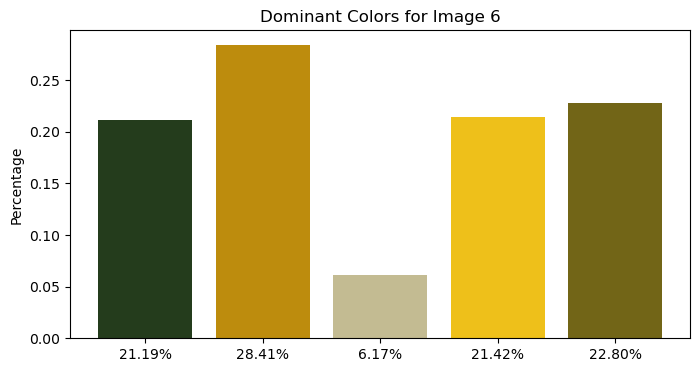

Image 6 Dominant Colors (RGB): [array([36, 60, 28], dtype=uint8), array([189, 140,  13], dtype=uint8), array([195, 187, 146], dtype=uint8), array([238, 192,  26], dtype=uint8), array([114, 101,  23], dtype=uint8)]
Image 6 Percentages: [0.21191488 0.28413467 0.06171835 0.21421765 0.22801445]

Cosine Similarity based on dominant colors between images:
Average Cosine Similarity between Image 1 and Image 2: 0.9003
Average Cosine Similarity between Image 1 and Image 3: 0.6422
Average Cosine Similarity between Image 1 and Image 4: 0.7757
Average Cosine Similarity between Image 1 and Image 5: 0.8919
Average Cosine Similarity between Image 1 and Image 6: 0.9200
Average Cosine Similarity between Image 2 and Image 3: 0.6033
Average Cosine Similarity between Image 2 and Image 4: 0.7453
Average Cosine Similarity between Image 2 and Image 5: 0.8446
Average Cosine Similarity between Image 2 and Image 6: 0.8982
Average Cosine Similarity between Image 3 and Image 4: 0.9041
Average Cosine Similarity be

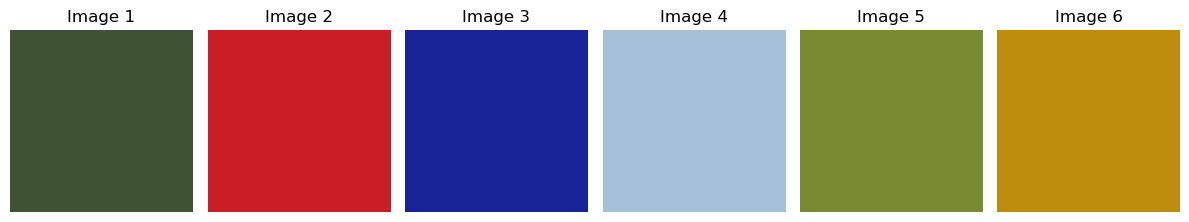

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os

def extract_dominant_colors(image_path, num_colors=5):
    image = cv2.imread(image_path)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    pixels = image_lab.reshape(-1, 3)
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)
    dominant_colors_lab = kmeans.cluster_centers_.astype(int)
    dominant_colors_rgb = [cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_LAB2RGB)[0][0] for color in dominant_colors_lab]
    _, counts = np.unique(kmeans.labels_, return_counts=True)
    percentages = counts / len(kmeans.labels_)
    return dominant_colors_lab, dominant_colors_rgb, percentages

def calculate_cosine_similarity(color_list1, color_list2):
    color_array1 = np.array(color_list1).reshape(-1, 3)
    color_array2 = np.array(color_list2).reshape(-1, 3)
    similarity_matrix = cosine_similarity(color_array1, color_array2)
    return similarity_matrix

def plot_dominant_colors_with_percentages(colors_rgb, percentages, title):
    plt.figure(figsize=(8, 4))
    for i, (color, percentage) in enumerate(zip(colors_rgb, percentages)):
        plt.bar(i, percentage, color=np.array(color) / 255)
    plt.xticks(range(len(colors_rgb)), [f'{percentage * 100:.2f}%' for percentage in percentages])
    plt.title(title)
    plt.ylabel('Percentage')
    plt.show()

def process_images(image_folder, num_colors=5):
    colors_lab_list = []
    colors_rgb_list = []
    percentages_list = []
    image_names = []

    for i in range(1, 7):
        image_path = os.path.join(image_folder, f'im{i}.jpeg')
        print(f"Processing {image_path}...")

        colors_lab, colors_rgb, percentages = extract_dominant_colors(image_path, num_colors)
        
        colors_lab_list.append(colors_lab)
        colors_rgb_list.append(colors_rgb)
        percentages_list.append(percentages)
        image_names.append(f'Image {i}')
        
        plot_dominant_colors_with_percentages(colors_rgb, percentages, f'Dominant Colors for Image {i}')
        
        # Debugging output
        print(f"{image_names[-1]} Dominant Colors (RGB): {colors_rgb}")
        print(f"{image_names[-1]} Percentages: {percentages}")

    print("\nCosine Similarity based on dominant colors between images:")
    for i in range(len(colors_rgb_list)):
        for j in range(i + 1, len(colors_rgb_list)):
            similarity_matrix = calculate_cosine_similarity(colors_rgb_list[i], colors_rgb_list[j])
            avg_similarity = np.mean(similarity_matrix)
            print(f"Average Cosine Similarity between {image_names[i]} and {image_names[j]}: {avg_similarity:.4f}")

    print("\nComparison of the most dominant color across all images:")
    for i, (colors_rgb, percentages) in enumerate(zip(colors_rgb_list, percentages_list)):
        most_dominant_color = colors_rgb[np.argmax(percentages)]
        most_dominant_percentage = np.max(percentages)
        print(f"{image_names[i]}: Most dominant color {most_dominant_color} with percentage {most_dominant_percentage * 100:.2f}%")
    
    print("\nVisual Comparison of Most Dominant Color in Each Image:")
    plt.figure(figsize=(12, 4))
    for i, (colors_rgb, percentages) in enumerate(zip(colors_rgb_list, percentages_list)):
        most_dominant_color = colors_rgb[np.argmax(percentages)]
        plt.subplot(1, 6, i + 1)
        plt.imshow([[most_dominant_color]])
        plt.axis('off')
        plt.title(f'{image_names[i]}')
    plt.tight_layout()
    plt.show()

image_folder = '/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images'
process_images(image_folder, num_colors=5)

Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im1.jpeg...


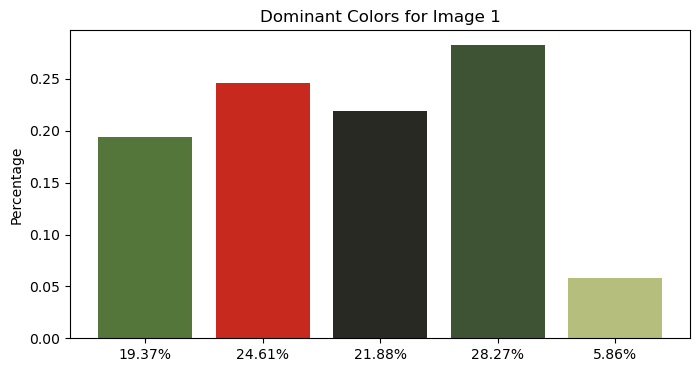

Image 1 Dominant Colors (RGB): [array([ 85, 118,  58], dtype=uint8), array([199,  41,  31], dtype=uint8), array([41, 41, 36], dtype=uint8), array([62, 83, 52], dtype=uint8), array([182, 190, 125], dtype=uint8)]
Image 1 Percentages: [0.19374069 0.24614009 0.21883756 0.28272231 0.05855936]
Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im2.jpeg...


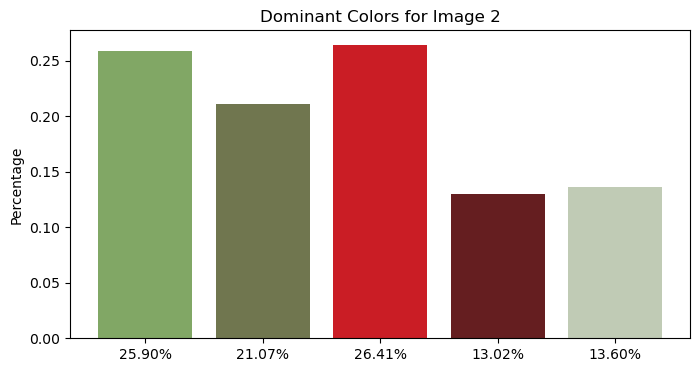

Image 2 Dominant Colors (RGB): [array([129, 167, 101], dtype=uint8), array([112, 118,  79], dtype=uint8), array([202,  29,  37], dtype=uint8), array([101,  30,  32], dtype=uint8), array([192, 203, 181], dtype=uint8)]
Image 2 Percentages: [0.25903626 0.21065077 0.26410333 0.13017387 0.13603577]
Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im3.jpeg...


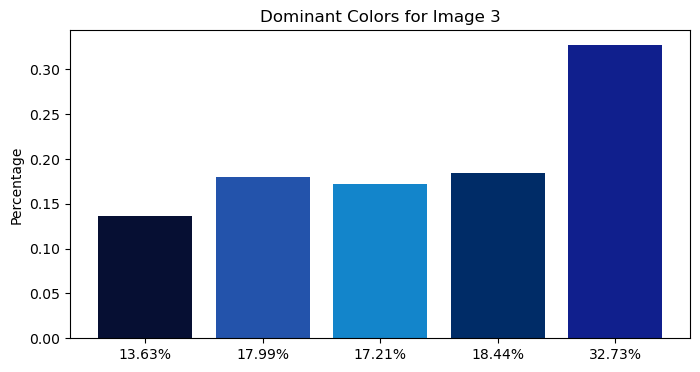

Image 3 Dominant Colors (RGB): [array([ 6, 15, 51], dtype=uint8), array([ 35,  83, 171], dtype=uint8), array([ 19, 133, 203], dtype=uint8), array([  0,  44, 103], dtype=uint8), array([ 16,  31, 141], dtype=uint8)]
Image 3 Percentages: [0.13633485 0.17989313 0.1720562  0.1844053  0.32731051]
Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im4.jpeg...


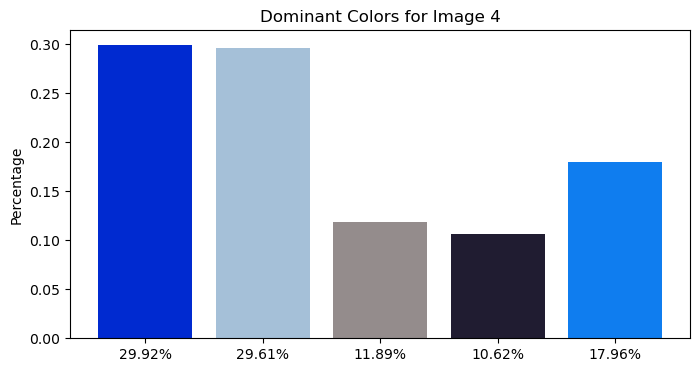

Image 4 Dominant Colors (RGB): [array([  0,  42, 208], dtype=uint8), array([165, 192, 216], dtype=uint8), array([148, 140, 140], dtype=uint8), array([32, 28, 49], dtype=uint8), array([ 15, 125, 239], dtype=uint8)]
Image 4 Percentages: [0.29923497 0.29609538 0.11888723 0.10615002 0.17963239]
Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im5.jpeg...


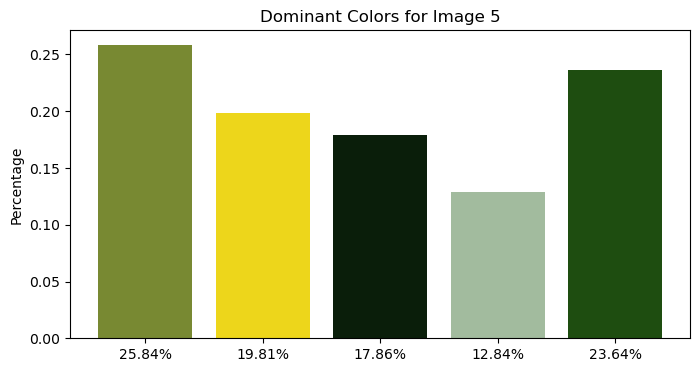

Image 5 Dominant Colors (RGB): [array([120, 137,  50], dtype=uint8), array([237, 214,  27], dtype=uint8), array([10, 30, 10], dtype=uint8), array([162, 187, 158], dtype=uint8), array([30, 77, 16], dtype=uint8)]
Image 5 Percentages: [0.25839563 0.19813299 0.17863217 0.12843638 0.23640283]
Processing /Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images/im6.jpeg...


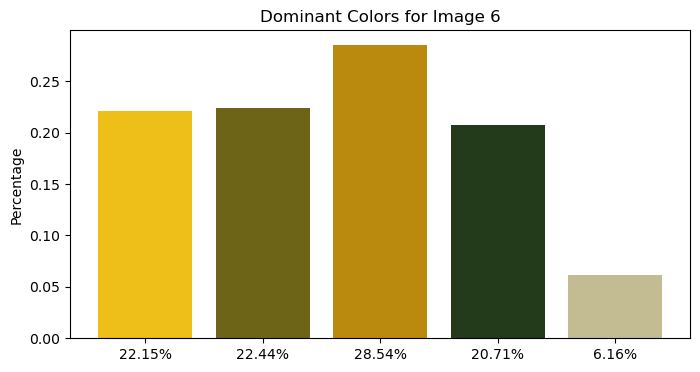

Image 6 Dominant Colors (RGB): [array([237, 191,  24], dtype=uint8), array([110, 100,  23], dtype=uint8), array([186, 138,  15], dtype=uint8), array([35, 59, 27], dtype=uint8), array([195, 187, 146], dtype=uint8)]
Image 6 Percentages: [0.2214833  0.22438163 0.28540517 0.20713066 0.06159924]

Minimum distances and similarities between images:
Min Distance between Image 1 and Image 2: 62.5620, Similarity: 0.8584
Min Distance between Image 1 and Image 3: 88.0965, Similarity: 0.8005
Min Distance between Image 1 and Image 4: 62.7216, Similarity: 0.8580
Min Distance between Image 1 and Image 5: 41.9285, Similarity: 0.9051
Min Distance between Image 1 and Image 6: 43.9318, Similarity: 0.9005
Min Distance between Image 2 and Image 3: 150.4294, Similarity: 0.6594
Min Distance between Image 2 and Image 4: 87.0976, Similarity: 0.8028
Min Distance between Image 2 and Image 5: 41.0488, Similarity: 0.9071
Min Distance between Image 2 and Image 6: 58.8558, Similarity: 0.8667
Min Distance between Imag

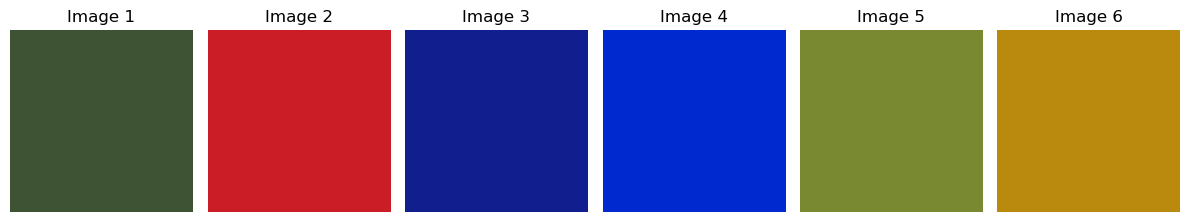

In [3]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

def extract_dominant_colors(image_path, num_colors=5):
    image = cv2.imread(image_path)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    pixels = image_lab.reshape(-1, 3)
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)
    dominant_colors_lab = kmeans.cluster_centers_.astype(int)
    dominant_colors_rgb = [cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_LAB2RGB)[0][0] for color in dominant_colors_lab]
    _, counts = np.unique(kmeans.labels_, return_counts=True)
    percentages = counts / len(kmeans.labels_)
    return dominant_colors_lab, dominant_colors_rgb, percentages

def calculate_min_distance(color_list1, color_list2):
    min_distance = float('inf')
    for color1 in color_list1:
        for color2 in color_list2:
            distance = np.linalg.norm(np.array(color1) - np.array(color2))
            min_distance = min(min_distance, distance)
    return min_distance

def plot_dominant_colors_with_percentages(colors_rgb, percentages, title):
    plt.figure(figsize=(8, 4))
    for i, (color, percentage) in enumerate(zip(colors_rgb, percentages)):
        plt.bar(i, percentage, color=np.array(color) / 255)
    plt.xticks(range(len(colors_rgb)), [f'{percentage * 100:.2f}%' for percentage in percentages])
    plt.title(title)
    plt.ylabel('Percentage')
    plt.show()

def process_images(image_folder, num_colors=5):
    colors_lab_list = []
    colors_rgb_list = []
    percentages_list = []
    image_names = []
    
    for i in range(1, 7):
        image_path = os.path.join(image_folder, f'im{i}.jpeg')
        print(f"Processing {image_path}...")

        colors_lab, colors_rgb, percentages = extract_dominant_colors(image_path, num_colors)
        
        colors_lab_list.append(colors_lab)
        colors_rgb_list.append(colors_rgb)
        percentages_list.append(percentages)
        image_names.append(f'Image {i}')
        
        plot_dominant_colors_with_percentages(colors_rgb, percentages, f'Dominant Colors for Image {i}')
        
        print(f"{image_names[-1]} Dominant Colors (RGB): {colors_rgb}")
        print(f"{image_names[-1]} Percentages: {percentages}")

    min_distances = []
    similarities = []

    print("\nMinimum distances and similarities between images:")
    for i in range(len(colors_rgb_list)):
        for j in range(i + 1, len(colors_rgb_list)):
            min_distance = calculate_min_distance(colors_rgb_list[i], colors_rgb_list[j])
            min_distances.append((image_names[i], image_names[j], min_distance))
            max_possible_distance = np.sqrt(3 * (255 ** 2))  # Max distance in RGB space
            similarity = 1 - (min_distance / max_possible_distance)
            similarities.append((image_names[i], image_names[j], similarity))
            print(f"Min Distance between {image_names[i]} and {image_names[j]}: {min_distance:.4f}, Similarity: {similarity:.4f}")

    print("\nComparison of the most dominant color across all images:")
    for i, (colors_rgb, percentages) in enumerate(zip(colors_rgb_list, percentages_list)):
        most_dominant_color = colors_rgb[np.argmax(percentages)]
        most_dominant_percentage = np.max(percentages)
        print(f"{image_names[i]}: Most dominant color {most_dominant_color} with percentage {most_dominant_percentage * 100:.2f}%")
    
    print("\nVisual Comparison of Most Dominant Color in Each Image:")
    plt.figure(figsize=(12, 4))
    for i, (colors_rgb, percentages) in enumerate(zip(colors_rgb_list, percentages_list)):
        most_dominant_color = colors_rgb[np.argmax(percentages)]
        plt.subplot(1, 6, i + 1)
        plt.imshow([[most_dominant_color]])
        plt.axis('off')
        plt.title(f'{image_names[i]}')
    plt.tight_layout()
    plt.show()

image_folder = '/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab3/images'
process_images(image_folder, num_colors=5)